In [1]:
# libraries
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#reading data and showig first five rows
data = pd.read_csv(r"C:\Users\brian\Desktop\ML\kaggle datasets\StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#finding if there are missing data
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
#data types of data
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
#removing duplicate rows
data.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

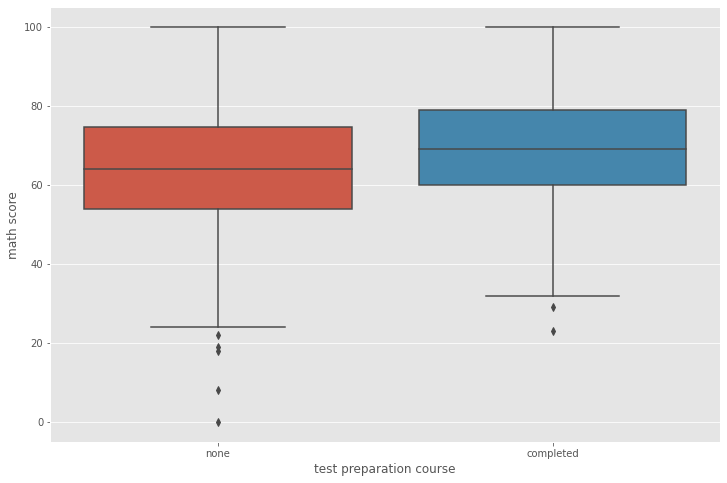

In [6]:
#boxplot showing effects of test preparation on math score
sns.boxplot(y=data['math score'], x=data['test preparation course'])

<AxesSubplot:xlabel='lunch', ylabel='math score'>

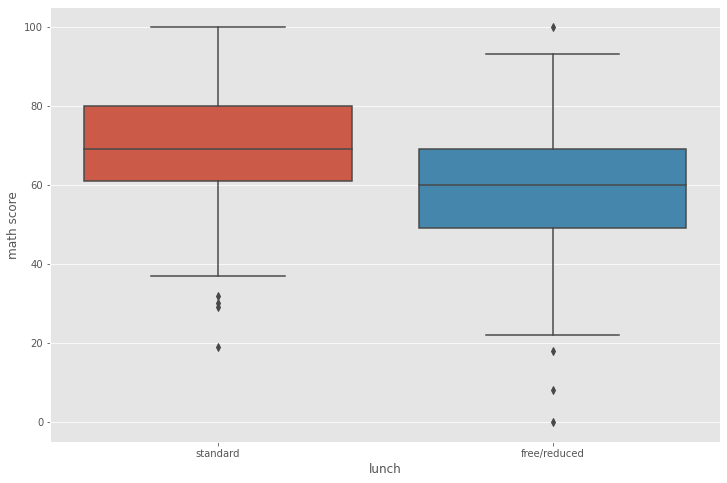

In [7]:
#boxplot showing difference in math score between lunch taken
sns.boxplot(y=data['math score'], x=data['lunch'])

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

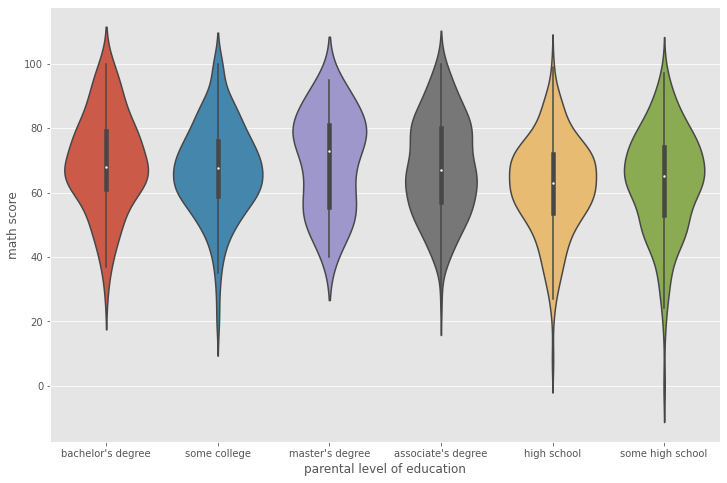

In [8]:
#violin plot showing whether parental level of education has an effect on math grade
sns.violinplot(x=data['parental level of education'], y=data['math score'])

<AxesSubplot:xlabel='gender', ylabel='math score'>

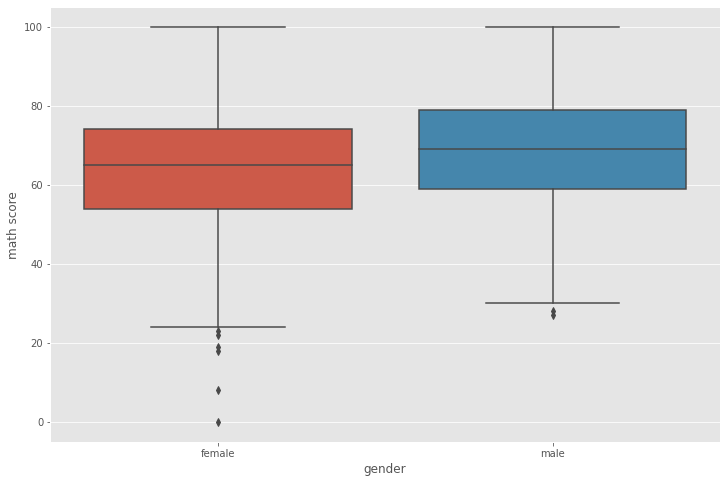

In [9]:
#boxplot showing difference in math score among gender
sns.boxplot(y=data['math score'], x=data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

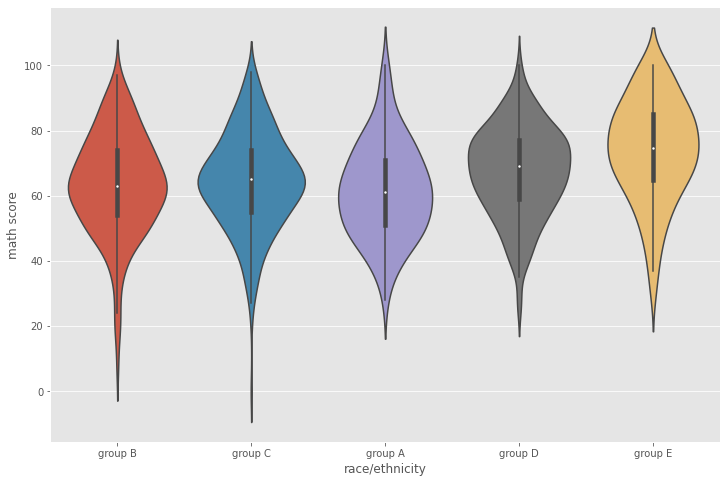

In [10]:
#violin plot showing whether race/ethnicity has an effect on math grade
sns.violinplot(x=data['race/ethnicity'], y=data['math score'])

<AxesSubplot:xlabel='math score', ylabel='writing score'>

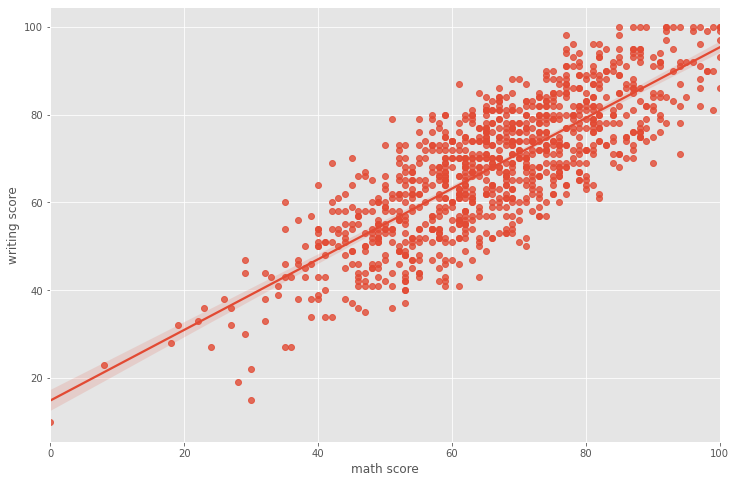

In [11]:
#comparison between math and writing score
sns.regplot(x='math score', y='writing score', data = data)

<AxesSubplot:xlabel='math score', ylabel='reading score'>

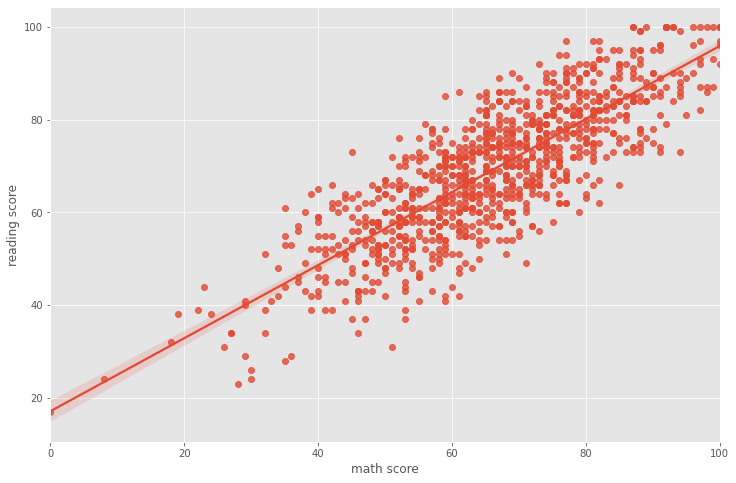

In [12]:
#compariso between math and reading score
sns.regplot(x='math score', y='reading score', data = data)

In [13]:
#correlation
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'Correlation matrix for numeric features')

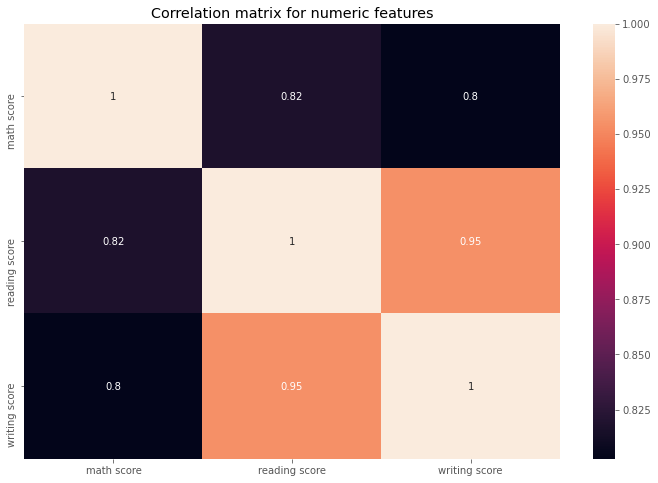

In [14]:
#heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')

In [15]:
#converting non-numeric data to categories
data_cat = data

for col in data_cat:
    if(data_cat[col].dtype=='object'):
        data_cat[col]=data_cat[col].astype('category')
        data_cat[col]=data_cat[col].cat.codes

data_cat

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


Text(0.5, 1.0, 'Correlation matrix for all features')

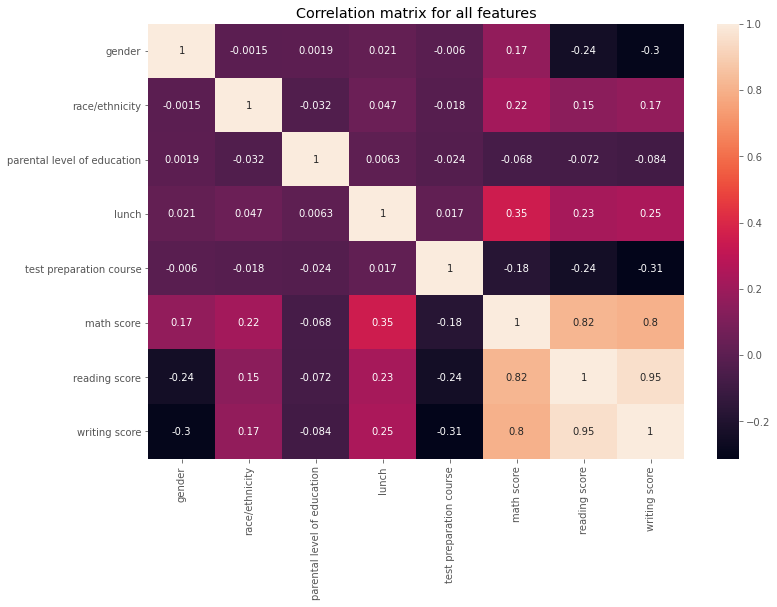

In [16]:
#heatmap of all features
correlation_matrix = data_cat.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for all features')

In [17]:
data_cat.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000


In [18]:
#unstacking the correlation values
corr_mat = data_cat.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

gender         gender                         1.000000
               race/ethnicity                -0.001502
               parental level of education    0.001913
               lunch                          0.021372
               test preparation course       -0.006028
                                                ...   
writing score  lunch                          0.245769
               test preparation course       -0.312946
               math score                     0.802642
               reading score                  0.954598
               writing score                  1.000000
Length: 64, dtype: float64

In [19]:
#showing the pairs as a list
corr_pairs.sort_values()

test preparation course      writing score                 -0.312946
writing score                test preparation course       -0.312946
gender                       writing score                 -0.301225
writing score                gender                        -0.301225
reading score                gender                        -0.244313
                                                              ...   
lunch                        lunch                          1.000000
parental level of education  parental level of education    1.000000
race/ethnicity               race/ethnicity                 1.000000
reading score                reading score                  1.000000
writing score                writing score                  1.000000
Length: 64, dtype: float64

In [20]:
#from the correlation analysis only math score, writing score and reading scores are correlated.

In [21]:
#however from the boxplots and violin plots there are slight differences scores and the other features.